In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [159]:
df = pd.read_csv('Advertising Budget and Sales.csv')

In [160]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [161]:
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [162]:
df.sample()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
30,31,292.9,28.3,43.2,21.4


In [163]:
df.shape

(200, 5)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [165]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [166]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [169]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [170]:
df.shape

(200, 4)

In [171]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [172]:
obj = {
    'TV Ad Budget ($)' : 'TV', 'Radio Ad Budget ($)' : 'Radio', 'Newspaper Ad Budget ($)' : 'Newspaper',
       'Sales ($)': 'Sales'
}

df = df.rename(columns=obj)

In [173]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


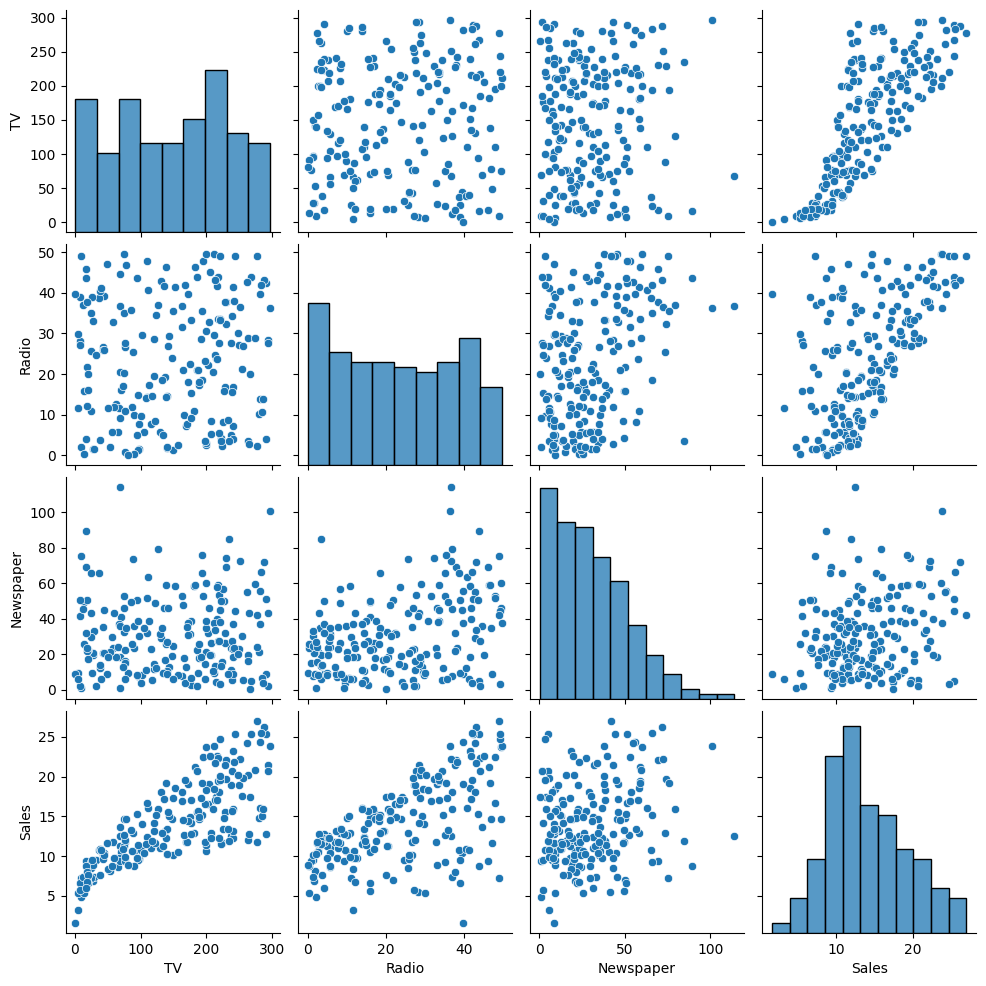

In [174]:
sns.pairplot(df)
plt.show()

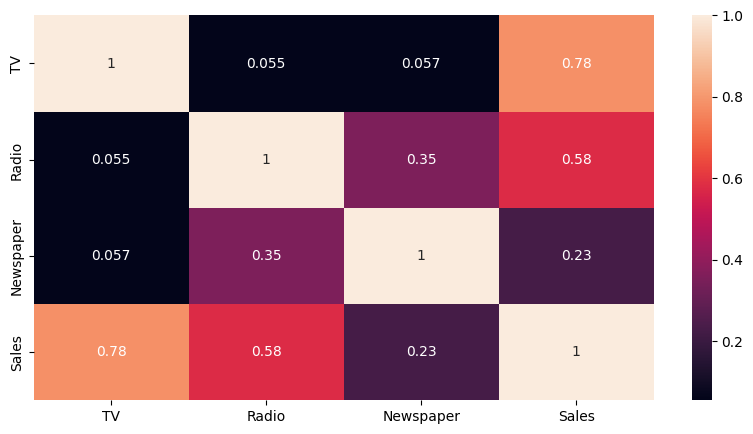

In [175]:
plt.figure(figsize=(10 , 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

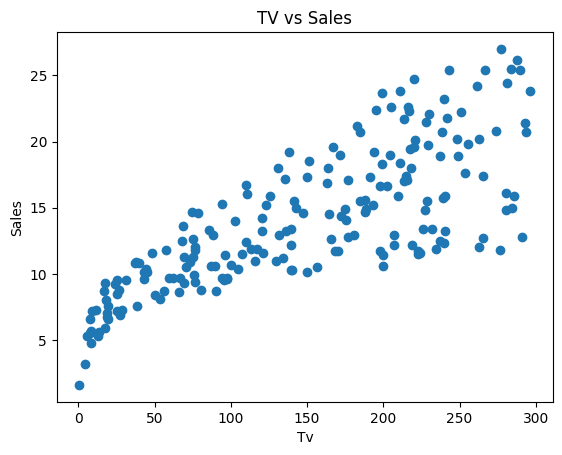

In [176]:
plt.scatter(df["TV"] , df["Sales"])
plt.title("TV vs Sales")
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.show()

In [177]:
x= df["TV"]
y=df["Sales"]

In [178]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [179]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [180]:
x.shape

(200,)

In [181]:
x = x.values.reshape(200 , 1)

In [182]:
x.shape

(200, 1)

In [183]:
y.shape

(200,)

In [184]:
y = y.values.reshape(200 , 1)
y.shape

(200, 1)

In [185]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

# Simple Linear Reggression


In [186]:
lr = LinearRegression()

In [187]:
lr.fit(x_train , y_train)

LinearRegression()

In [188]:
y_predict = lr.predict(x_test)
y_predict

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

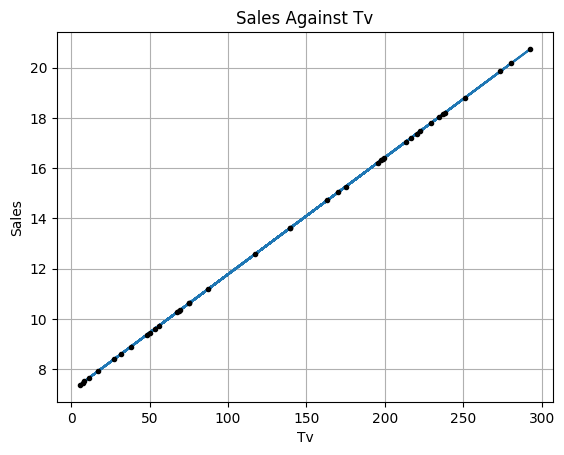

In [189]:
plt.figure()
plt.title("Sales Against Tv")
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.plot(x_test , y_predict )
plt.plot(x_test , y_predict , 'k.')
plt.grid()
plt.show()


In [190]:
for i , predictions in enumerate(y_predict):
    print('actual price %s and predicted price %s' %(y_test[i] , predictions))

actual price [16.9] and predicted price [14.71794394]
actual price [22.4] and predicted price [16.2115484]
actual price [21.4] and predicted price [20.74819743]
actual price [7.3] and predicted price [7.66403631]
actual price [24.7] and predicted price [17.37013877]
actual price [12.6] and predicted price [10.61402143]
actual price [22.3] and predicted price [17.2072847]
actual price [8.4] and predicted price [9.44612512]
actual price [11.5] and predicted price [17.46785121]
actual price [14.9] and predicted price [15.2669948]
actual price [9.5] and predicted price [8.58532504]
actual price [8.7] and predicted price [9.73460946]
actual price [11.9] and predicted price [18.03086098]
actual price [5.3] and predicted price [7.37089899]
actual price [10.3] and predicted price [13.61053628]
actual price [11.7] and predicted price [15.03899911]
actual price [5.5] and predicted price [7.45930549]
actual price [16.6] and predicted price [16.31391381]
actual price [11.3] and predicted price [10

In [191]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [192]:
# y_test = actual values
# y_predict = model prediction

mse  = mean_squared_error(y_test , y_predict)
mae = mean_absolute_error(y_test , y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)


print('mse : ' , mse)
print('mae : ' , mae)
print('r2 : ' , r2)
print('rmse : ' , rmse )

mse :  10.204654118800956
mae :  2.444420003751042
r2 :  0.6766954295627076
rmse :  3.194472431998898


# Multi Linear Regression


In [193]:
x = df.drop('Sales' , axis=1)
y = df['Sales']

In [194]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [195]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [196]:
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [197]:
lr.fit(x_train,y_train)


LinearRegression()

In [198]:
y_pred = lr.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [199]:
for i , predictions in enumerate(y_pred):
    print('actual price %s and predicted price %s' %(y_test.iloc[i] , predictions))

actual price 16.9 and predicted price 16.408024203228628
actual price 22.4 and predicted price 20.889882087147885
actual price 21.4 and predicted price 21.553843179089558
actual price 7.3 and predicted price 10.6085025619849
actual price 24.7 and predicted price 22.112373259857662
actual price 12.6 and predicted price 13.105591724016454
actual price 22.3 and predicted price 21.057191916314647
actual price 8.4 and predicted price 7.461010344558369
actual price 11.5 and predicted price 13.60634580543393
actual price 14.9 and predicted price 15.155069668921398
actual price 9.5 and predicted price 9.048319924103865
actual price 8.7 and predicted price 6.653283124939039
actual price 11.9 and predicted price 14.345544865081424
actual price 5.3 and predicted price 8.903493328870406
actual price 10.3 and predicted price 9.689590280381115
actual price 11.7 and predicted price 12.16494385914241
actual price 5.5 and predicted price 8.736283973362841
actual price 16.6 and predicted price 16.265072

In [200]:
# y_test = actual values
# y_predict = model prediction

mse  = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print('mse : ' , mse)
print('mae : ' , mae)
print('r2 : ' , r2)
print('rmse : ' , rmse )

mse :  3.1740973539761033
mae :  1.4607567168117603
r2 :  0.899438024100912
rmse :  1.78159966153345


# polynominal Regression


In [201]:
poly_features = PolynomialFeatures(degree=2)

In [202]:
x_train = poly_features.fit_transform(x_train)
x_test = poly_features.fit_transform(x_test)

In [203]:
pr = LinearRegression()


In [204]:
pr.fit(x_train ,y_train)

LinearRegression()

In [205]:
y_pred = pr.predict(x_test)
y_pred

array([17.25443578, 22.7193321 , 20.42799436,  7.542709  , 24.37103037,
       12.55927164, 22.80784986,  8.34371358, 12.0586023 , 15.69024565,
        7.89166367,  8.27082715, 11.86055971,  6.16591094, 10.57664393,
       12.3628954 ,  6.74390963, 16.65082111, 10.68661722, 19.03888161,
       20.15223945, 13.1137814 ,  9.56273868, 22.10675225,  8.96725241,
        7.7794437 , 22.40745151, 12.72065973, 10.25529986,  6.22368636,
       11.64677688, 10.22431946, 23.39763949,  9.17403232, 15.36143449,
       21.05675814, 10.9795286 , 20.23370753, 11.85153256,  6.58779915])

In [206]:
for i , predictions in enumerate(y_pred):
    print('actual price %s and predicted price %s' %(y_test.iloc[i] , predictions))

actual price 16.9 and predicted price 17.25443578421151
actual price 22.4 and predicted price 22.719332098787888
actual price 21.4 and predicted price 20.4279943599341
actual price 7.3 and predicted price 7.542708996441649
actual price 24.7 and predicted price 24.371030368769677
actual price 12.6 and predicted price 12.559271635604164
actual price 22.3 and predicted price 22.807849861474054
actual price 8.4 and predicted price 8.343713576679239
actual price 11.5 and predicted price 12.058602302533435
actual price 14.9 and predicted price 15.690245648360365
actual price 9.5 and predicted price 7.891663667904025
actual price 8.7 and predicted price 8.270827153870238
actual price 11.9 and predicted price 11.860559712580104
actual price 5.3 and predicted price 6.165910943379144
actual price 10.3 and predicted price 10.576643926736509
actual price 11.7 and predicted price 12.362895400851478
actual price 5.5 and predicted price 6.743909627103889
actual price 16.6 and predicted price 16.65082

In [207]:
# y_test = actual values
# y_predict = model prediction

mse  = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


print('mse : ' , mse)
print('mae : ' , mae)
print('r2 : ' , r2)
print('rmse : ' , rmse )

mse :  0.41291022853790765
mae :  0.5261794444043838
r2 :  0.9869181490609602
rmse :  0.6425809120553673
